# Declaration of Originality

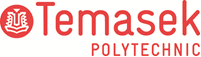

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :
* Tutorial Group                :  
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [5]:
## Import libraries
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import joblib


# 1. Business Understanding
Goal: ?

# 2. Data Understanding

## 2.1 Load dataset

In [6]:
## Read *.csv file into pandas DataFrame
## Read *.csv file into pandas DataFrame
FILE_PATH = 'student_depression_dataset.csv'
df = pd.read_csv(FILE_PATH)
df


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


## 2.2 Summary Statistics

In [19]:
## Understand the type of variable for each column
## Understand the type of variable for each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [20]:
## Check for missing data
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [21]:
## Describe data distribution
# Summary statistics for numerical features
df.describe()


,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

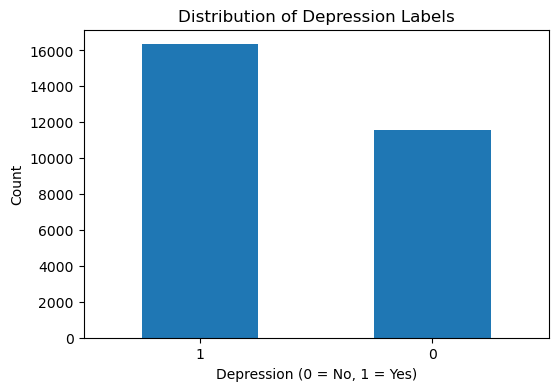

In [23]:
## Understanding distribution of target variable
plt.figure(figsize=(6,4))
df["Depression"].value_counts().plot(kind="bar")
plt.title("Distribution of Depression Labels")
plt.xlabel("Depression (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

**Interpretation:**  
The dataset shows a slightly imbalanced distribution between depressed and non-depressed students.  
This suggests that evaluation metrics beyond accuracy, such as F1-score, should be considered.

### 2.3.1.2 Understanding distribution of features

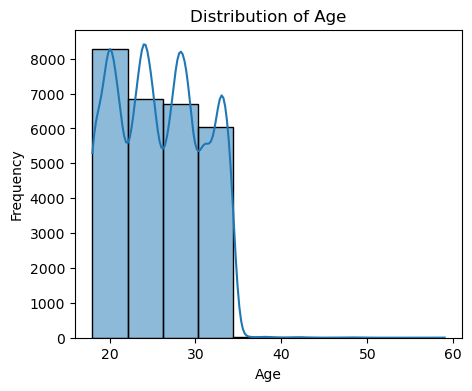

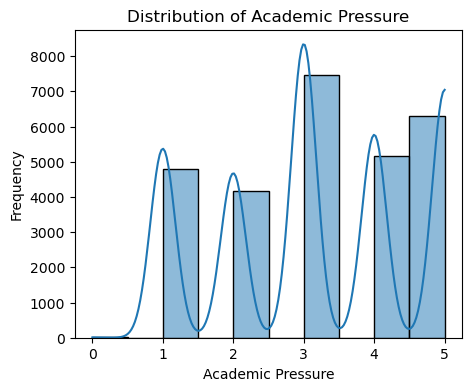

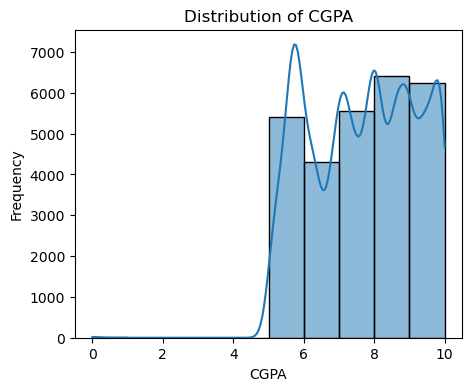

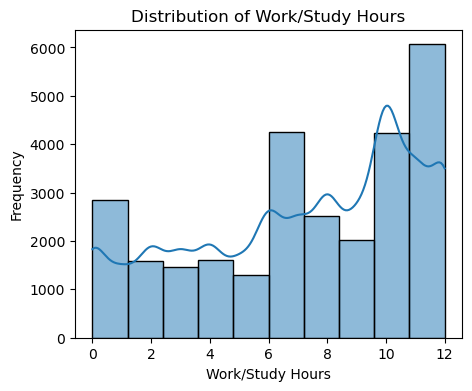

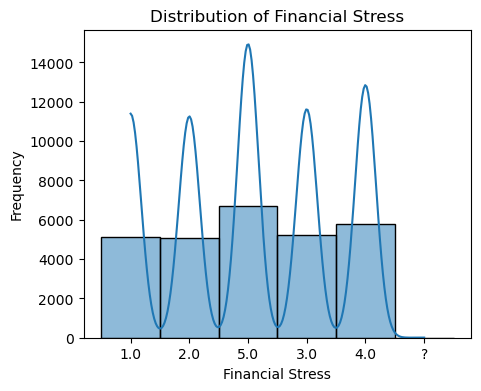

In [24]:
## Understanding distribution of features
# Distribution of key numerical features
numerical_features = [
    "Age",
    "Academic Pressure",
    "CGPA",
    "Work/Study Hours",
    "Financial Stress"
]

for feature in numerical_features:
    plt.figure(figsize=(5, 4))
    sns.histplot(df[feature], bins=10, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


**Distribution of Numerical Features**
Histograms were used to visualise the distribution of key numerical features, including age, academic pressure, CGPA, work/study hours, and financial stress. These visualisations help identify the spread, central tendency, and potential skewness of each feature, providing insight into typical student profiles and highlighting any unusual values that may influence model performance.

### 2.3.2 Understanding relationship between variables

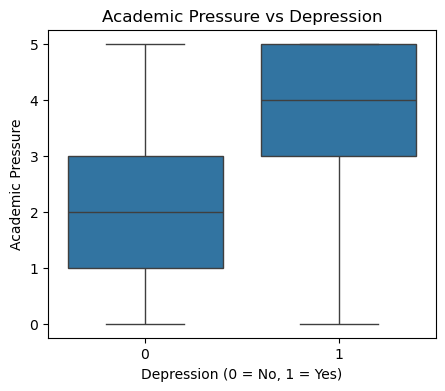

In [25]:
## Understanding relationship between variables
# Relationship between academic pressure and depression
plt.figure(figsize=(5, 4))
sns.boxplot(x="Depression", y="Academic Pressure", data=df)
plt.title("Academic Pressure vs Depression")
plt.xlabel("Depression (0 = No, 1 = Yes)")
plt.ylabel("Academic Pressure")
plt.show()


**Interpretation:**  
The boxplot compares academic pressure levels between depressed and non-depressed students. Students with depression tend to report higher academic pressure, as indicated by a higher median and overall upward shift in the distribution. This suggests that academic pressure is an important factor associated with student depression.

### 2.3.3 Understanding relationship between financial stress and depression

C:\Users\reyes\AppData\Local\Temp\ipykernel_29252\3513598123.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Depression", y="Financial Stress", data=df, ci=None)


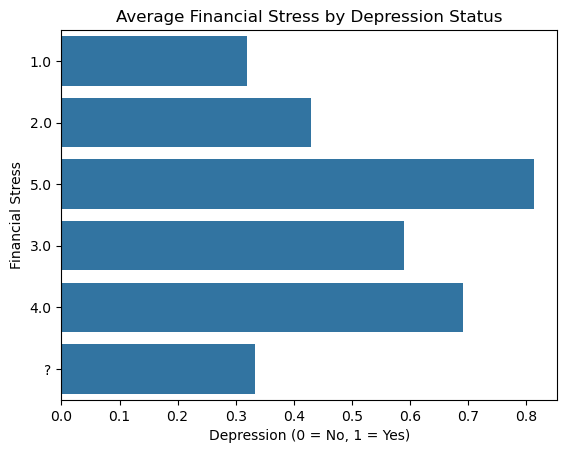

In [26]:
# Relationship between financial stress and depression

sns.barplot(x="Depression", y="Financial Stress", data=df, ci=None)
plt.title("Average Financial Stress by Depression Status")
plt.xlabel("Depression (0 = No, 1 = Yes)")
plt.ylabel("Financial Stress")
plt.show()

**Interpretation:**  
The bar chart shows the average financial stress levels for depressed and non-depressed students. Students with depression exhibit higher average financial stress compared to those without depression, indicating a positive association between financial pressure and depression risk.

### 2.3.4 Understanding relationship between sleep duration and depression

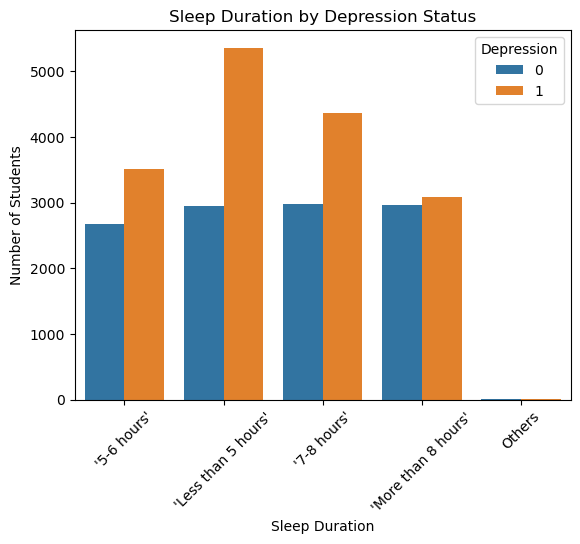

In [27]:
# Relationship between sleep duration and depression
sns.countplot(x="Sleep Duration", hue="Depression", data=df)
plt.title("Sleep Duration by Depression Status")
plt.xlabel("Sleep Duration")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

**Interpretation:**
The countplot shows the distribution of sleep duration categories for depressed and non-depressed students. Students with shorter sleep durations appear more frequently in the depressed group, while longer sleep durations are more common among non-depressed students. This suggests that insufficient sleep is associated with a higher risk of depression.

### 2.3.5 Understanding relationship between study satisfaction and depression

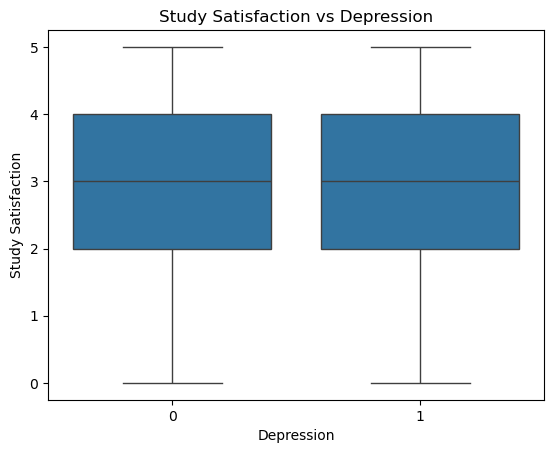

In [28]:
# Relationship between study satisfaction and depression
sns.boxplot(x="Depression", y="Study Satisfaction", data=df)
plt.title("Study Satisfaction vs Depression")
plt.show()

**Interpretation:**
The distributions of study satisfaction for depressed and non-depressed students largely overlap, with similar median values. This indicates that study satisfaction alone has a weak relationship with depression and is not a strong standalone predictor, though it may still provide supplementary information in the model.

### 2.3.6 Understanding the correlation of numerical features 

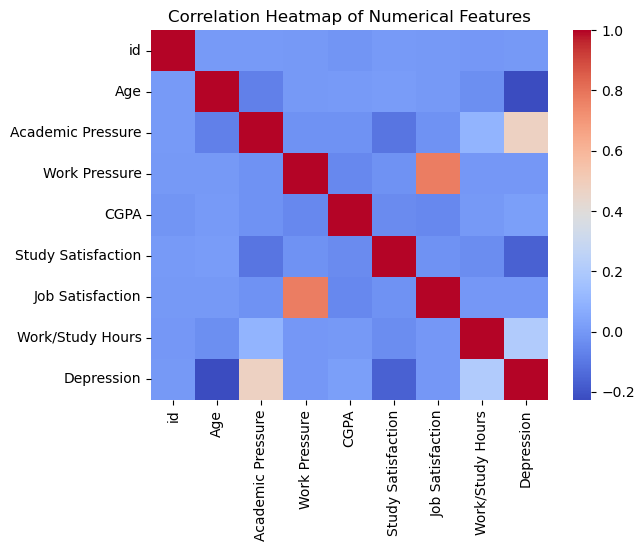

In [29]:
# Correlation heatmap of numerical features
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_cols.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Interpretation:**  
Several numerical features show moderate correlation with depression.  
These relationships help guide feature selection and model design.

# 3. Data Preparation

## 3.1 Data Cleaning

### 3.1.1 Dropping irrelevant data under 'City'

In [30]:
## Clean data
# df = df.drop(['3', 'City', 'Less Delhi', 'Less than 5 Kalyan', 'M.Com', 'M.Tech', 'ME'] , axis=0)
# df

df = df[df['City'] != '3.0']
df = df[df['City'] != 'City']
df = df[df['City'] != "'Less Delhi'"]
df = df[df['City'] != "'Less than 5 Kalyan'"]
df = df[df['City'] != 'M.Com']
df = df[df['City'] != 'M.Tech']
df = df[df['City'] != 'ME']
df = df[df['City'] != 'Saanvi']
df = df[df['City'] != 'Bhavna']
df = df[df['City'] != 'Mira']
df = df[df['City'] != 'Harsha']
df = df[df['City'] != 'Vaanya']
df = df[df['City'] != 'Gaurav']
df = df[df['City'] != 'Harsh']
df = df[df['City'] != 'Reyansh']
df = df[df['City'] != 'Kibara']
df = df[df['City'] != 'Rashi']
df = df[df['City'] != 'Nalyan']
df = df[df['City'] != 'Mihir']
df = df[df['City'] != 'Nalini']
df = df[df['City'] != 'Nandini']
df


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


Dropped these 'cities' as they are not actual cities. They're just random responses from people and are irrelevant

### 3.1.2 dropping the target variable

In [31]:
col_y = 'Depression'

## split data into features (x) and target (y)
y = df[col_y] ## select target column

col_irrelevant = [col_y, 'id'] ## columns to drop from feature set

X = df.drop(col_irrelevant, axis=1) ## select feature columns
X

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes
27897,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes
27898,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No
27899,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No


**Interpretation:**
The target variable Depression is separated from the dataset to form the label y. Irrelevant columns such as the target itself and the unique identifier (id) are removed from the feature set. The remaining columns are used as input features X for model training and evaluation.

### 3.1.3 One hot encoding

In [32]:
## One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)  # TODO: encode categorical columns
X

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Gender_Male,City_Ahmedabad,City_Bangalore,...,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Financial Stress_2.0,Financial Stress_3.0,Financial Stress_4.0,Financial Stress_5.0,Financial Stress_?,Family History of Mental Illness_Yes
0,33.0,5.0,0.0,8.97,2.0,0.0,3.0,True,False,False,...,False,False,False,True,False,False,False,False,False,False
1,24.0,2.0,0.0,5.90,5.0,0.0,3.0,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,31.0,3.0,0.0,7.03,5.0,0.0,9.0,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,28.0,3.0,0.0,5.59,2.0,0.0,4.0,False,False,False,...,False,False,False,True,False,False,False,True,False,True
4,25.0,4.0,0.0,8.13,3.0,0.0,1.0,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,27.0,5.0,0.0,5.75,5.0,0.0,7.0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
27897,27.0,2.0,0.0,9.40,3.0,0.0,0.0,True,False,False,...,True,False,False,False,False,True,False,False,False,True
27898,31.0,3.0,0.0,6.61,4.0,0.0,12.0,True,False,False,...,False,False,False,False,True,False,False,False,False,False
27899,18.0,5.0,0.0,6.88,2.0,0.0,10.0,False,False,False,...,False,False,False,True,False,False,False,True,False,False


**Interpretation:**
Categorical variables are converted into numerical format using one-hot encoding. This allows machine learning models to process non-numeric data by representing the categories as binary features. 

## 3.2 Train-Test Split

In [33]:
## Split data into train set and test set
# ## 3.3 Train-Test Split
from sklearn.model_selection import train_test_split
test_size = 0.3  # TODO: choose test_size
random_state = 2025  # TODO: choose random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

**Interpretation:**
The dataset is split into training and testing sets using a 70:30 ratio. The training set is used to train the models, while the test set is reserved for evaluating performance on unseen data. A fixed random state is used to ensure reproducibility of the results.

# 4. Modelling

### 4.2 Train Model

In [15]:
## Initialise and train model


# 5. Model Evaluation

In [16]:
## Evaluate model


In [17]:
## New data

## Predict


## Iterative model development


In [18]:
## Further feature engineering / feature selection